#  Medical Insurance Cost Prediction

<img src="insurance.webp" style="width:800px; ">

**Student Name: M.R.M.Ashfaq** <br>
**Registration Number: EG/2021/4417** <br>
**-----------------------------**  
**Student Name: M.K.M.Shamil**<br>
**Registration Number: EG/2021/4810**


In this project, we aim to utilize the **Medical Cost Personal Datasets** dataset from Kaggle, which contains various features that impact medical insurance costs. The primary objective is to predict medical insurance costs using machine learning models such as Linear Regression and Random Forest and compare their performance to determine the better model. The workflow includes exploratory data analysis (EDA), data preprocessing,  and training machine learning models.

Data Link: https://www.kaggle.com/datasets/mirichoi0218/insurance


#### Features of the Dataset

There are alltogether 06 features and the target variable (charges). A description of the dataset features is provided below :

* **age** : Age of the insured
* **sex** : Gender of the insured
* **bmi** : Body Mass Index ( Unit $kg/m^2$)
* **children** : Number of children
* **smoker** : Indicator if they smoke
* **region** : Region where the insured lives


So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict medical insurance costs.

## Load the Necessary Libraries

In [848]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [849]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('./insurance.csv')

In [850]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis (EDA)

##### Count of Rows and Column

In [851]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

##### Info about datasets

In [852]:
# Concise summary using info()
print("Insurance Dataset Info:")
insurance_dataset.info()

Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Features Types

In [853]:
# Identify numerical features
numerical_features = insurance_dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical features
categorical_features = insurance_dataset.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['age', 'bmi', 'children', 'charges']
Categorical Features: ['sex', 'smoker', 'region']


##### Numerical feature description

In [854]:
# Generate descriptive analytics for numerical features
numerical_summary = insurance_dataset[numerical_features].describe()

# Print the descriptive statistics
print("Descriptive Analytics for Numerical Features:")
print(numerical_summary)


Descriptive Analytics for Numerical Features:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


##### Categorical feature description

In [855]:
#count of sex attributes
insurance_dataset['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

In [856]:
#count og smoker attributesi
insurance_dataset['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [857]:
#count og region attributes
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

##### Checking null values


In [858]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##### Checking duplicates


In [859]:
# Checking for duplicated values
insurance_dataset.duplicated().sum()

1

## Data Visualization



#### Outliers


For age attributes


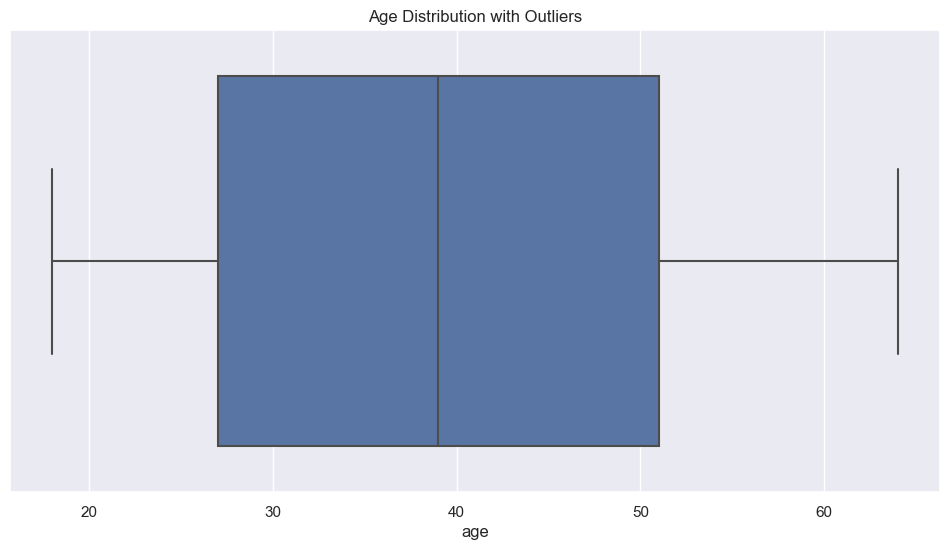

In [860]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['age'])  
plt.title('Age Distribution with Outliers')

plt.show()

For bmi attributes


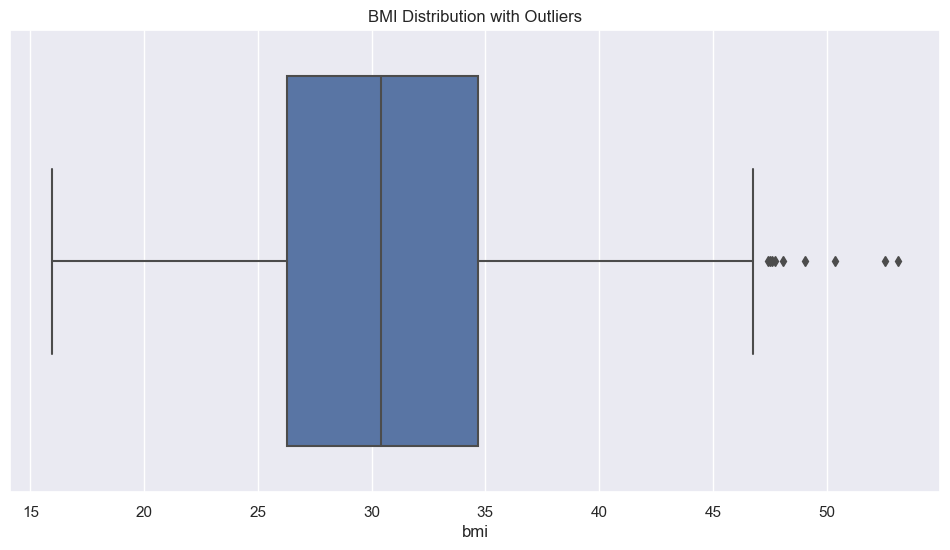

In [861]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['bmi'])  
plt.title('BMI Distribution with Outliers')

plt.show()

For children attributes


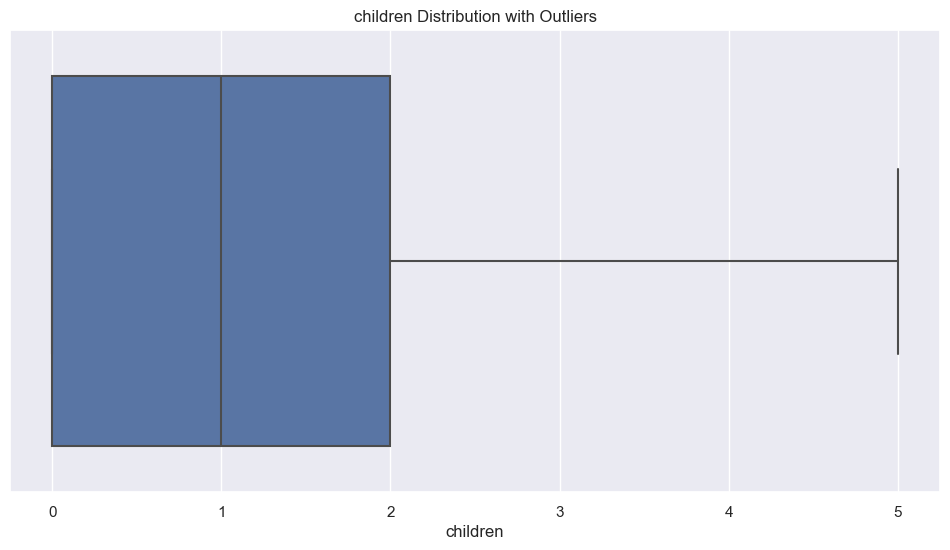

In [862]:
sns.set()

plt.figure(figsize=(12, 6))
sns.boxplot(x=insurance_dataset['children'])
plt.title('children Distribution with Outliers')

plt.show()

##### Numerical Features Graphs


Age Distribution

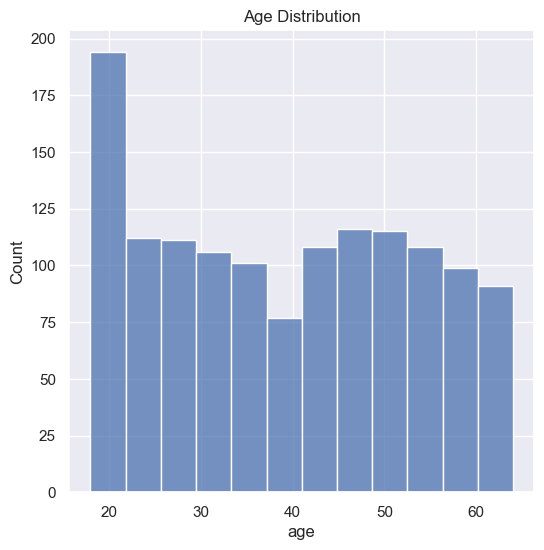

In [863]:
# Distribution of age values
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'],)
plt.title('Age Distribution')
plt.show()

BMI Distribution

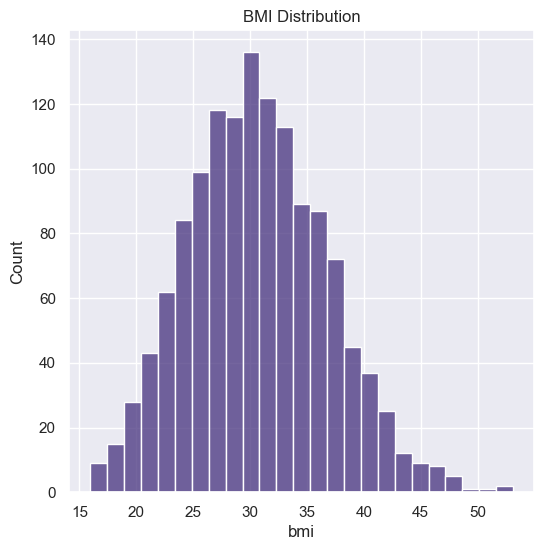

In [864]:
#bmi Distribution
plt.figure(figsize=(6,6))
sns.set_palette("viridis")
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Children Distribution

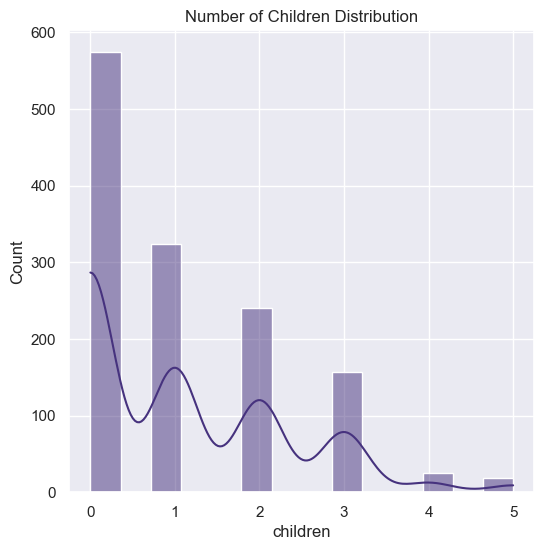

In [865]:
plt.figure(figsize=(6,6))
sns.histplot(data=insurance_dataset, x='children',kde=True)
plt.title('Number of Children Distribution')
plt.show()

##### Categorical Features Graphs


Sex Distribution

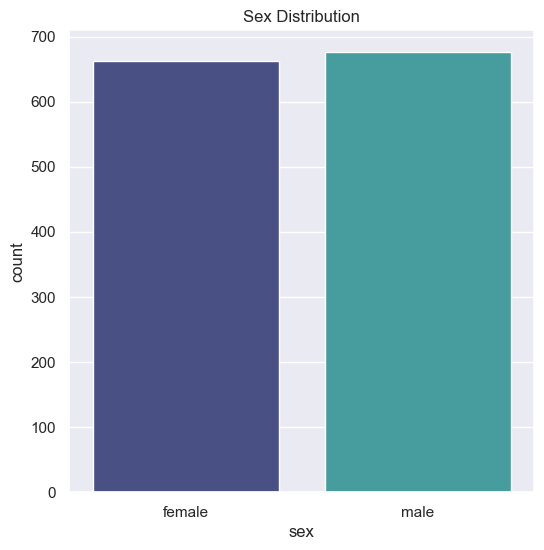

In [866]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_dataset,palette='mako')
plt.title('Sex Distribution')
plt.show()

Smoker Distribution

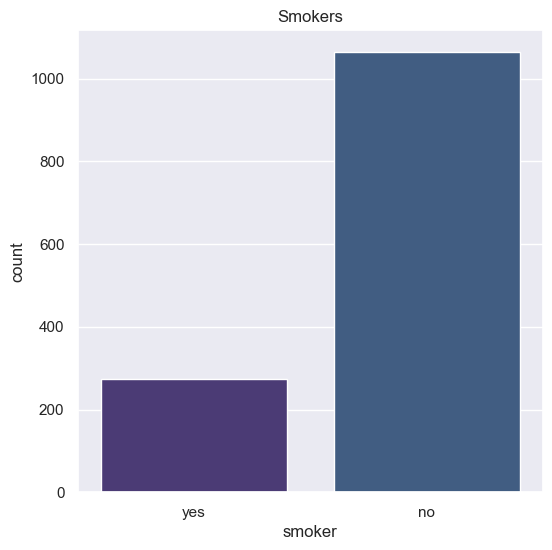

In [867]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smokers')
plt.show()

Region Distribution

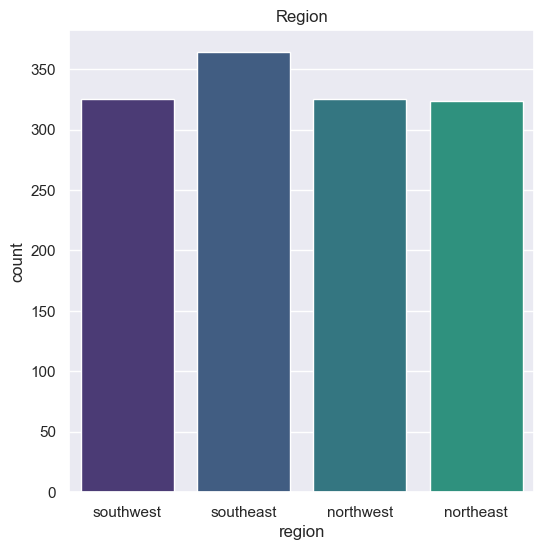

In [868]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

### Correlation Matrix ( Numerical attributes )

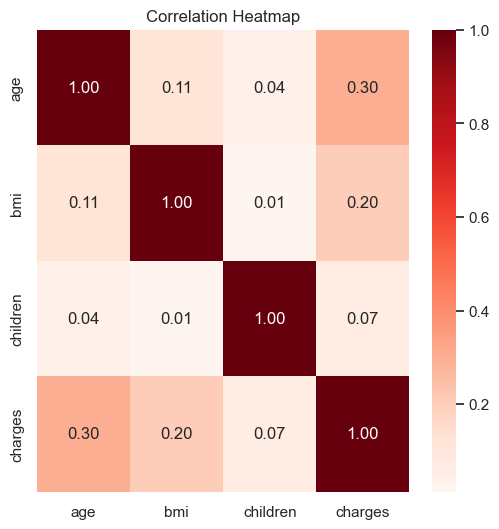

In [869]:
# Extract numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges'] 

# Calculate the correlation matrix
correlation_matrix = insurance_dataset[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Chi square matrix ( Categorical attributes )

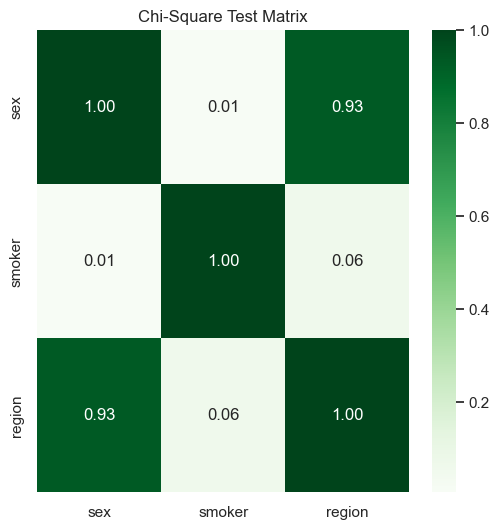

In [870]:
from scipy.stats import chi2_contingency

# Extract only the categorical columns
categorical_columns = insurance_dataset.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame to store the results
chi_square_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            chi_square_matrix.loc[col1, col2] = 1.0  # Perfect relationship with itself
        else:
            # Create a contingency table
            contingency_table = pd.crosstab(insurance_dataset[col1], insurance_dataset[col2])
            
            # Perform Chi-Square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Store the p-value (or chi2 if preferred) in the matrix
            chi_square_matrix.loc[col1, col2] = p

# Convert to numeric type for heatmap visualization
chi_square_matrix = chi_square_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(6,6))
sns.heatmap(chi_square_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Chi-Square Test Matrix')
plt.show()

for scipy chi square matrix p value less than significant level (0.05) is considered as high correlation among the attributes 

## Data Preprocessing

### Handle the Missing Data

In [871]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

So there is no null value 

### Treating  Duplicate Records

Count of Duplicates

In [872]:
# Number of duplicates
insurance_dataset.duplicated().sum()

1

Remove Duplicates

In [873]:
# Delete this duplicate
insurance_dataset.drop_duplicates(inplace=True)

Count of Duplicates

In [874]:
# Number of duplicates after removing
insurance_dataset.duplicated().sum()

0

### Treating  Oulier

##### Only **BMI attributes** has outlier according to above box whisker plot 


Getting Outliers Values

In [875]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = insurance_dataset['bmi'].quantile(0.25)
Q3 = insurance_dataset['bmi'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Upper Limit of box whisker plot

In [876]:
# Print upper biundary
print(upper_bound)

47.31500000000001


Lower Limit of box whisker plot

In [877]:
# Print lower biundary
print(lower_bound)

13.674999999999994


Outlier Details

In [878]:
# Identify outliers
outliers = insurance_dataset[(insurance_dataset['bmi'] < lower_bound) | (insurance_dataset['bmi'] > upper_bound)]

print(outliers[['bmi']])


        bmi
116   49.06
286   48.07
401   47.52
543   47.41
847   50.38
860   47.60
1047  52.58
1088  47.74
1317  53.13


In [879]:
print("Number of BMI outliers using IQR method:", outliers.shape[0])

Number of BMI outliers using IQR method: 9


Remove Outliers

In [880]:
insurance_dataset = insurance_dataset[(insurance_dataset['bmi'] >= lower_bound) & (insurance_dataset['bmi'] <= upper_bound)]

After Removing Outliers

In [881]:
outliers_count = insurance_dataset[(insurance_dataset['bmi'] < lower_bound) | (insurance_dataset['bmi'] > upper_bound)].shape[0]

print("Number of BMI outliers using IQR method:", outliers_count)

Number of BMI outliers using IQR method: 0


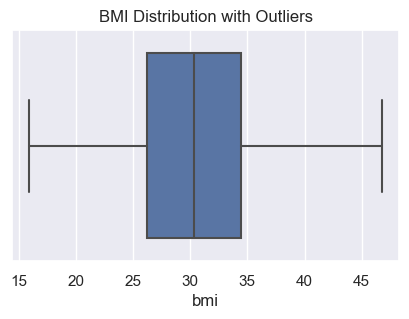

In [882]:
sns.set()

plt.figure(figsize=(5, 3))
sns.boxplot(x=insurance_dataset['bmi'])  
plt.title('BMI Distribution with Outliers')

plt.show()

### Feature selection

#### For Numerical Attributes ( Correlation Matrix )

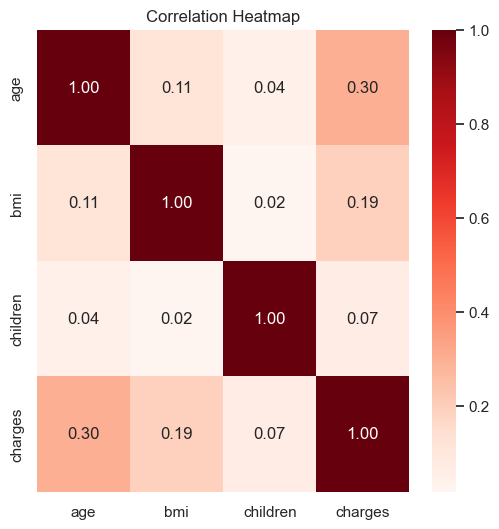

In [883]:
# Extract numerical columns
numerical_columns = ['age', 'bmi', 'children', 'charges'] 

# Calculate the correlation matrix
correlation_matrix = insurance_dataset[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(6,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In the correlation matrix, the **children attribute** has very low correlation with the charges (target variable), so we can consider removing this feature from the dataset. Since there are no very strong correlations among the features themselves, no further feature removals. ((children attribute has a non normal distribution))

##### Remove children attributes

In [884]:
# Remove the 'children' column from the dataset
insurance_dataset = insurance_dataset.drop(columns=['children'])

# Check the shape of the dataset to confirm that the column has been removed
print(f"Dataset shape after removing 'children': {insurance_dataset.shape}")

Dataset shape after removing 'children': (1328, 6)


##### After removed children attributes

In [885]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


#### For Categorical Attributes ( Chi Sqaure Matrix )

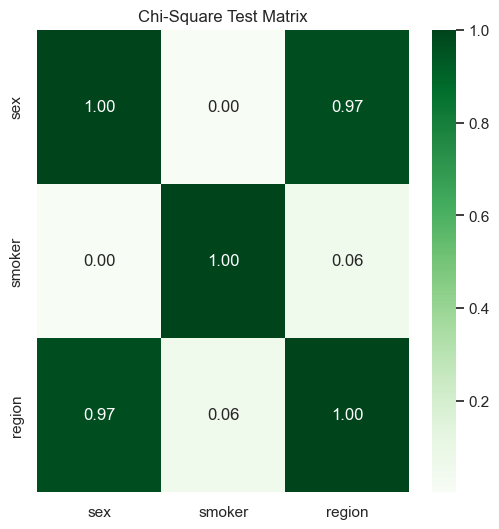

In [886]:
from scipy.stats import chi2_contingency

# Extract only the categorical columns
categorical_columns = insurance_dataset.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame to store the results
chi_square_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Loop through each pair of categorical columns
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 == col2:
            chi_square_matrix.loc[col1, col2] = 1.0  # Perfect relationship with itself
        else:
            # Create a contingency table
            contingency_table = pd.crosstab(insurance_dataset[col1], insurance_dataset[col2])
            
            # Perform Chi-Square test
            chi2, p, _, _ = chi2_contingency(contingency_table)
            
            # Store the p-value (or chi2 if preferred) in the matrix
            chi_square_matrix.loc[col1, col2] = p

# Convert to numeric type for heatmap visualization
chi_square_matrix = chi_square_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(6,6))
sns.heatmap(chi_square_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Chi-Square Test Matrix')
plt.show()

for scipy chi square matrix p value less than significat level (0.05) is considered as high correlation among the attributes. so in this matrix we can see **gender and smoker attributes** has hight correlation among them. So we can remove any one of attribute between them. I choose **sex attributes**. because sex has high R squared value

##### Remove sex attributes

In [887]:

# Remove the 'smoker' column from the dataset
insurance_dataset = insurance_dataset.drop(columns=['sex'])

# Check the shape of the dataset to confirm that the column has been removed
print(f"Dataset shape after removing 'sex': {insurance_dataset.shape}")

Dataset shape after removing 'sex': (1328, 5)


##### After removed sex attributes

In [888]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,bmi,smoker,region,charges
0,19,27.900,yes,southwest,16884.92400
1,18,33.770,no,southeast,1725.55230
2,28,33.000,no,southeast,4449.46200
3,33,22.705,no,northwest,21984.47061
4,32,28.880,no,northwest,3866.85520


### Handle the categorical features

Data types before encoding

In [889]:
# Concise summary using info()
print("Insurance Dataset Info:")
insurance_dataset.info()

Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1328 non-null   int64  
 1   bmi      1328 non-null   float64
 2   smoker   1328 non-null   object 
 3   region   1328 non-null   object 
 4   charges  1328 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 62.2+ KB


Label Encode for smoker attribute

In [890]:
# Encoding sex column
insurance_dataset.replace({'smoker':{'yes':1,'no':0}},inplace=True)

# Check the updated dataset
display(insurance_dataset.head())

,age,bmi,smoker,region,charges
0,19,27.900,1,southwest,16884.92400
1,18,33.770,0,southeast,1725.55230
2,28,33.000,0,southeast,4449.46200
3,33,22.705,0,northwest,21984.47061
4,32,28.880,0,northwest,3866.85520


One Hot Encode for region attribute

In [891]:
# Perform one-hot encoding for the 'region' column
region_encoded = pd.get_dummies(insurance_dataset['region'], prefix='region')

# Drop region column
insurance_dataset.drop(columns=['region'], inplace=True)

# Optionally, you can join the encoded columns back to the original dataset
insurance_dataset = insurance_dataset.join(region_encoded)

# Check the updated dataset
display(insurance_dataset.head())


,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,1,16884.92400,0,0,0,1
1,18,33.770,0,1725.55230,0,0,1,0
2,28,33.000,0,4449.46200,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0
4,32,28.880,0,3866.85520,0,1,0,0


Data types after encoding

In [892]:
# Concise summary 
print("Insurance Dataset Info:")
insurance_dataset.info()

Insurance Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1328 non-null   int64  
 1   bmi               1328 non-null   float64
 2   smoker            1328 non-null   int64  
 3   charges           1328 non-null   float64
 4   region_northeast  1328 non-null   uint8  
 5   region_northwest  1328 non-null   uint8  
 6   region_southeast  1328 non-null   uint8  
 7   region_southwest  1328 non-null   uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 89.4 KB


Feature Scaling ( Standardization )

In [893]:
from sklearn.preprocessing import StandardScaler

# Assuming 'insurance_dataset' is your dataframe and 'numerical_columns' is the list of numerical features
numerical_columns = ['age', 'bmi']  # Example numerical columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the StandardScaler to the numerical columns and create a new DataFrame with standardized values
insurance_dataset[numerical_columns] = scaler.fit_transform(insurance_dataset[numerical_columns])

# Check the result
display(insurance_dataset.head())

,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440429,-0.445495,1,16884.92400,0,0,0,1
1,-1.511669,0.546068,0,1725.55230,0,0,1,0
2,-0.799261,0.415999,0,4449.46200,0,0,1,0
3,-0.443056,-1.323037,0,21984.47061,0,1,0,0
4,-0.514297,-0.279953,0,3866.85520,0,1,0,0


### Store Feature Matrix in X and Target in Vecter y

In [894]:
X = insurance_dataset.drop(['charges'], axis=1)

In [895]:
y = insurance_dataset['charges']

### Train / Test split

##### Split into 80/20

In [896]:
from sklearn.model_selection import train_test_split

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Display train dataset

In [897]:
display(X_train.head())

,age,bmi,smoker,region_northeast,region_northwest,region_southeast,region_southwest
414,-1.440429,0.779178,0,0,1,0,0
171,0.696798,-0.040086,0,0,0,0,1
947,-0.158093,0.618704,1,1,0,0,0
1013,0.625557,0.297755,0,0,1,0,0
210,-1.369188,0.415999,0,0,0,0,1


##### Display test dataset

In [898]:
display(X_test.head())

,age,bmi,smoker,region_northeast,region_northwest,region_southeast,region_southwest
1210,-0.229333,0.057043,0,0,1,0,0
115,1.480448,-0.328096,0,1,0,0,0
986,0.269353,-0.071336,0,0,1,0,0
176,-0.086852,-0.456475,0,0,1,0,0
63,-0.799261,-0.777424,0,0,1,0,0


### Import the models

In [899]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Model Training 

### Linear regression

##### Model training for linear regression

In [900]:
linearRegression_model = LinearRegression()
linearRegression_model.fit(X_train, y_train)

LinearRegression()

##### Predict the target values for both

In [901]:
y_pred_train = linearRegression_model.predict(X_train)
y_pred_test = linearRegression_model.predict(X_test)

##### Calculating evaluation metrix for train data set

In [902]:
# Calculating evaluation metrics
lin_mse_train = mean_squared_error(y_train, y_pred_train)
lin_rmse_train = np.sqrt(lin_mse_train)
lin_mae_train = mean_absolute_error(y_train, y_pred_train)
lin_r2_train = r2_score(y_train, y_pred_train)


print(f"Training Set Evaluation Metrics for Linear Regression:")
print(f"\nMean Squared Error (MSE): {lin_mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {lin_mae_train:.2f}")
print(f"R-squared (R²): {lin_r2_train:.2f}")

Training Set Evaluation Metrics for Linear Regression:

Mean Squared Error (MSE): 36574947.53
Root Mean Squared Error (RMSE): 6047.72
Mean Absolute Error (MAE): 4195.20
R-squared (R²): 0.75


##### Calculating evaluation metrix for test data set

In [903]:
lin_mse_test = mean_squared_error(y_test, y_pred_test)
lin_rmse_test = np.sqrt(lin_mse_test)
lin_mae_test = mean_absolute_error(y_test, y_pred_test)
lin_r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set Evaluation Metrics for Linear Regression:")
print(f"\nMean Squared Error (MSE): {lin_mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {lin_rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {lin_mae_test:.2f}")
print(f"R-squared (R²): {lin_r2_test:.2f}")

Test Set Evaluation Metrics for Linear Regression:

Mean Squared Error (MSE): 35456225.21
Root Mean Squared Error (RMSE): 5954.51
Mean Absolute Error (MAE): 4139.90
R-squared (R²): 0.74


### Random Forest 

##### Model training for Random Forest

In [904]:
randomForest_model = RandomForestRegressor()
randomForest_model.fit(X_train, y_train)

RandomForestRegressor()

##### Predict the target values for both

In [905]:
y_pred_train = randomForest_model.predict(X_train)
y_pred_test = randomForest_model.predict(X_test)

##### Calculating evaluation metrix for train data set

In [906]:
# Calculating evaluation metrics
ran_mse_train = mean_squared_error(y_train, y_pred_train)
ran_rmse_train = np.sqrt(ran_mse_train)
ran_mae_train = mean_absolute_error(y_train, y_pred_train)
ran_r2_train = r2_score(y_train, y_pred_train)

print(f"Training Set Evaluation Metrics for Linear Regression:")
print(f"\nMean Squared Error (MSE): {ran_mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {ran_rmse_train:.2f}")
print(f"Mean Absolute Error (MAE): {ran_mae_train:.2f}")
print(f"R-squared (R²): {ran_r2_train:.2f}")

Training Set Evaluation Metrics for Linear Regression:

Mean Squared Error (MSE): 3860228.21
Root Mean Squared Error (RMSE): 1964.75
Mean Absolute Error (MAE): 1096.46
R-squared (R²): 0.97


##### Calculating evaluation metrix for test data set

In [907]:
ran_mse_test = mean_squared_error(y_test, y_pred_test)
ran_rmse_test = np.sqrt(ran_mse_test)
ran_mae_test = mean_absolute_error(y_test, y_pred_test)
ran_r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set Evaluation Metrics for Linear Regression:")
print(f"\nMean Squared Error (MSE): {ran_mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {ran_rmse_test:.2f}")
print(f"Mean Absolute Error (MAE): {ran_mae_test:.2f}")
print(f"R-squared (R²): {ran_r2_test:.2f}")


Test Set Evaluation Metrics for Linear Regression:

Mean Squared Error (MSE): 23406417.32
Root Mean Squared Error (RMSE): 4838.02
Mean Absolute Error (MAE): 2582.81
R-squared (R²): 0.83


### Compare Performance Visulally

In [908]:
# Format the table as a string with proper alignment
table = f"""
| Metric   | **Linear Regression (Train)** | **Random Forest (Train)**  | **Linear Regression (Test)** | **Random Forest (Test)** |
| -------- | ----------------------------- | -------------------------- | ---------------------------- | ------------------------ |
| **MSE**  | {lin_mse_train:.2f}           | {ran_mse_train:.2f}        | {lin_mse_test:.2f}           | {ran_mse_test:.2f}       |
| **RMSE** | {lin_rmse_train:.2f}          | {ran_rmse_train:.2f}       | {lin_rmse_test:.2f}          | {ran_rmse_test:.2f}      |
| **MAE**  | {lin_mae_train:.2f}           | {ran_mae_train:.2f}        | {lin_mae_test:.2f}           | {ran_mae_test:.2f}       |
| **R²**   | {lin_r2_train:.2f}            | {ran_r2_train:.2f}         | {lin_r2_test:.2f}            | {ran_r2_test:.2f}        |
"""

from IPython.display import Markdown
display(Markdown(table))




| Metric   | **Linear Regression (Train)** | **Random Forest (Train)**  | **Linear Regression (Test)** | **Random Forest (Test)** |
| -------- | ----------------------------- | -------------------------- | ---------------------------- | ------------------------ |
| **MSE**  | 36574947.53           | 3860228.21        | 35456225.21           | 23406417.32       |
| **RMSE** | 6047.72          | 1964.75       | 5954.51          | 4838.02      |
| **MAE**  | 4195.20           | 1096.46        | 4139.90           | 2582.81       |
| **R²**   | 0.75            | 0.97         | 0.74            | 0.83        |


## Conclusion

The project compared the performance of **Random Forest** and **Linear Regression** on a given dataset, evaluating them on key metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²). According to all the values evaluation matrics **Random Forest** is good for this model.
